In [5]:
!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install upgrade plotly

  Using cached yfinance-0.2.65-py2.py3-none-any.whl.metadata (5.8 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl.metadata (5.5 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.2/949.2 kB 6.4 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 26.2 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.18.2-cp312-cp312-macosx_11_0_arm64.whl size=264368 sha256=ea7b3d1224da6a23bc79fd845e882368ecab76733fca725181e74452cd4bbfe8
  Stored in directory: /Users/a1-6/Library/Caches/pip/wheels/d1/df/a9/0202b051c65b11c992dd6db9f2babdd2c44ec7d35d511be5d3
Successfully built peewee
ERROR: Could not find a version that satisfies the requirement upgrade (from versions: none)
ERROR: No matching distribution found for upgrade


In [7]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests

In [9]:
def make_graph(stock_data, revenue_data, stock_name):
    plt.figure(figsize=(14, 8))
    
    # 绘制股价
    plt.subplot(2, 1, 1)
    plt.plot(stock_data['Close'], label='Close Price', color='blue')
    plt.title(f'{stock_name} Stock Price and Revenue')
    plt.ylabel('Price (USD)')
    plt.legend()
    
    # 绘制营收
    plt.subplot(2, 1, 2)
    plt.plot(revenue_data['Revenue'], label='Revenue', color='green')
    plt.xlabel('Date')
    plt.ylabel('Revenue (USD)')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

In [11]:
# 股票数据（TSLA）
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
print(tesla_data.head())

                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667  281494500   
2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667  257806500   
2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000  123282000   
2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   77097000   
2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000  103003500   

                           Dividends  Stock Splits  
Date                                                
2010-06-29 00:00:00-04:00        0.0           0.0  
2010-06-30 00:00:00-04:00        0.0           0.0  
2010-07-01 00:00:00-04:00        0.0           0.0  
2010-07-02 00:00:00-04:00        0.0           0.0  
2010-07-06 00:00:00-04:00        0.0           0.0  


In [13]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, 'html.parser')

# TSLA营收表格
tesla_revenue = pd.read_html(str(soup))[0]
tesla_revenue.columns = ['Date', 'Revenue']
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace('$', '').str.replace(',', '').astype(float)

print(tesla_revenue.tail())

    Date  Revenue
8   2013   2013.0
9   2012    413.0
10  2011    204.0
11  2010    117.0
12  2009    112.0


/var/folders/nh/xtmmgvqn5l37138dkrb6v4d80000gn/T/ipykernel_3054/2845702333.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tesla_revenue = pd.read_html(str(soup))[0]


In [15]:
# GameStop股票数据（GME）
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
print(gme_data.head())

                               Open      High       Low     Close    Volume  \
Date                                                                          
2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
2002-02-20 00:00:00-05:00  1.615920  1.662209  1.603296  1.662209   6892800   

                           Dividends  Stock Splits  
Date                                                
2002-02-13 00:00:00-05:00        0.0           0.0  
2002-02-14 00:00:00-05:00        0.0           0.0  
2002-02-15 00:00:00-05:00        0.0           0.0  
2002-02-19 00:00:00-05:00        0.0           0.0  
2002-02-20 00:00:00-05:00        0.0           0.0  


In [17]:
# GameStop营收数据
gme_revenue = pd.read_html(str(soup))[1]
gme_revenue.columns = ['Date', 'Revenue']
gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace('$', '').str.replace(',', '').astype(float)
print(gme_revenue.tail())

          Date  Revenue
49  2010-06-30     28.0
50  2010-03-31     21.0
51  2009-12-31      NaN
52  2009-09-30     46.0
53  2009-06-30     27.0


/var/folders/nh/xtmmgvqn5l37138dkrb6v4d80000gn/T/ipykernel_3054/2839714975.py:2: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  gme_revenue = pd.read_html(str(soup))[1]


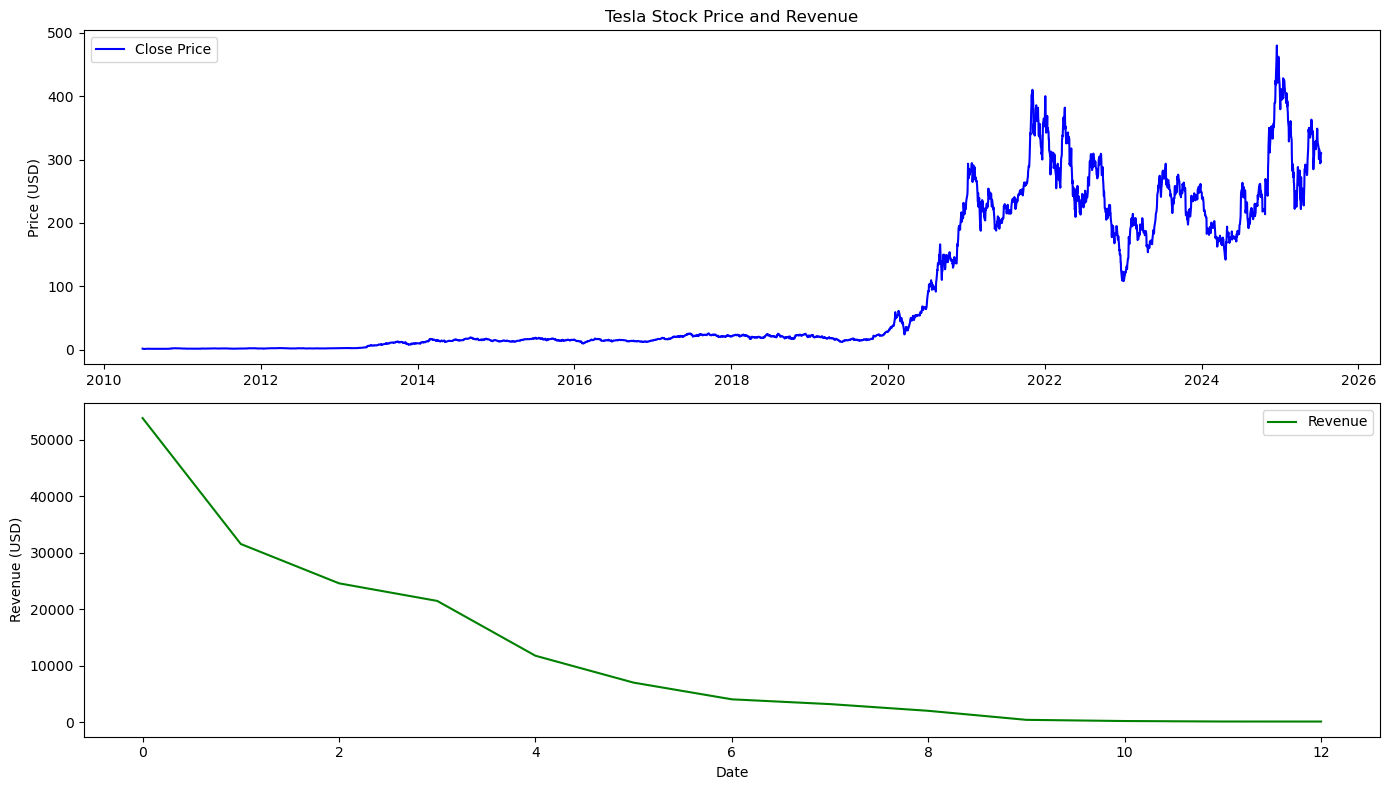

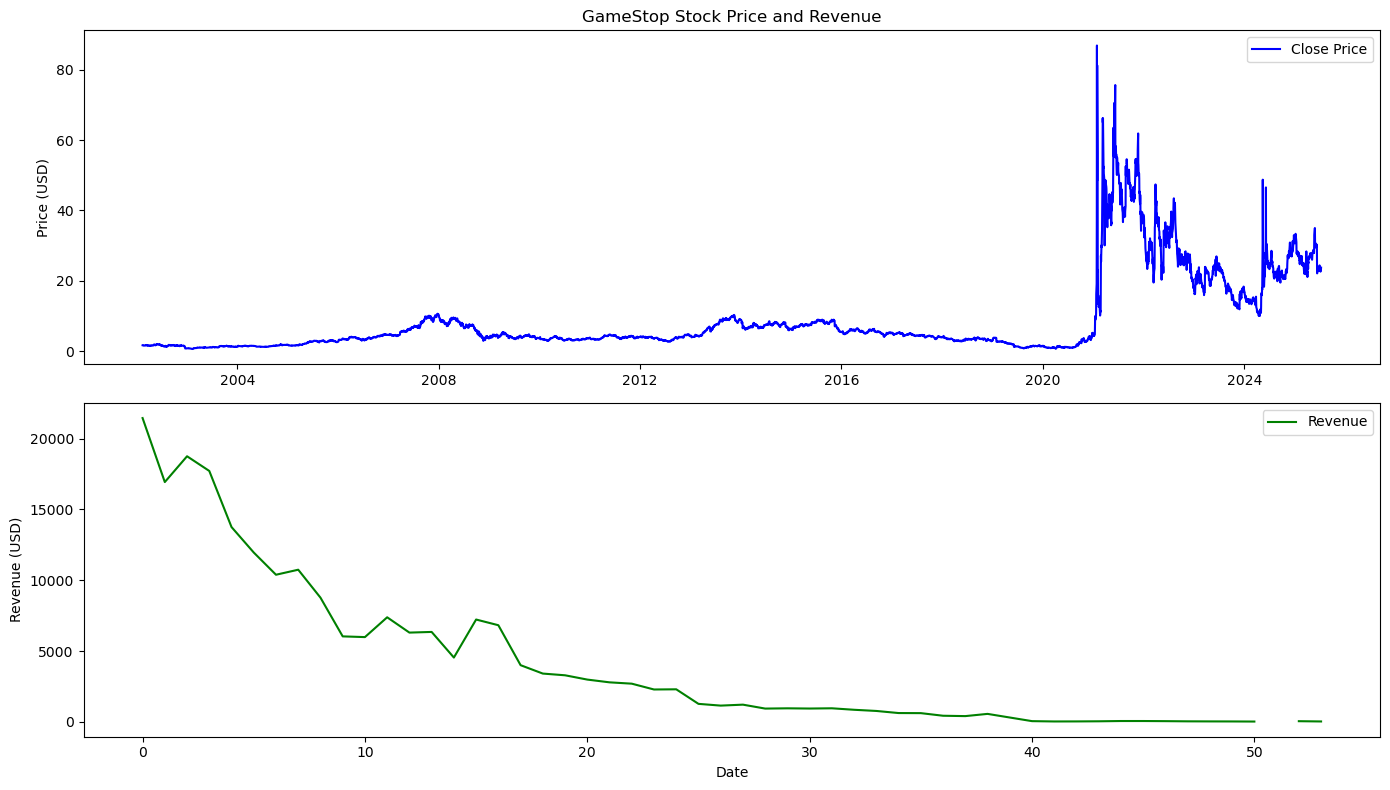

In [19]:
# 特斯拉图表
make_graph(tesla_data, tesla_revenue, 'Tesla')

# GameStop图表
make_graph(gme_data, gme_revenue, 'GameStop')